In [1]:
# plotting
from datetime import datetime

import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import numpy as np

# calculation
import pandas as pd
import plotting_module
import xarray as xr
import xesmf as xe

Ground to 300 hPa boxplots

In [2]:
omimls_ds = xr.open_dataarray(
    "/glade/u/home/mvoncyga/SOARS_2025/300hpa_full_monthly_omimls_tco.nc"
)

In [3]:
cesm_output = xr.open_dataarray(
    "/glade/u/home/mvoncyga/SOARS_2025/300hPa_tco_cesm_monthly.nc"
)

In [4]:
# regridding
regridder = xe.Regridder(cesm_output, omimls_ds, "bilinear", periodic=True)
cesm_output = regridder(cesm_output)

In [5]:
omimls_ds = omimls_ds.mean(dim={"longitude", "yearmonth"})
cesm_output = cesm_output.mean(dim={"longitude", "time"})

In [6]:
omimls_ds = omimls_ds.dropna(dim="latitude")
cesm_output = cesm_output.dropna(dim="latitude")

In [7]:
omimls_ds_0_29n = omimls_ds.sel(latitude=slice(-0.5, 29.5))
omimls_ds_29_59n = omimls_ds.sel(latitude=slice(29.5, 59.5))
omimls_ds_59_89n = omimls_ds.sel(latitude=slice(59.5, 89.5))

cesm_output_0_29n = cesm_output.sel(latitude=slice(-0.5, 29.5))
cesm_output_29_59n = cesm_output.sel(latitude=slice(29.5, 59.5))
cesm_output_59_89n = cesm_output.sel(latitude=slice(59.5, 89.5))

In [8]:
omimls_ds_0_29s = omimls_ds.sel(latitude=slice(-29.5, 0.5))
omimls_ds_29_59s = omimls_ds.sel(latitude=slice(-59.5, -29.5))
omimls_ds_59_89s = omimls_ds.sel(latitude=slice(-89.5, -59.5))

cesm_output_0_29s = cesm_output.sel(latitude=slice(-29.5, 0.5))
cesm_output_29_59s = cesm_output.sel(latitude=slice(-59.5, -29.5))
cesm_output_59_89s = cesm_output.sel(latitude=slice(-89.5, -59.5))

In [19]:
data = [
    [omimls_ds_59_89s, cesm_output_59_89s],
    [omimls_ds_29_59s, cesm_output_29_59s],
    [omimls_ds_0_29s, cesm_output_0_29s],
    [omimls_ds_0_29n, cesm_output_0_29n],
    [omimls_ds_29_59n, cesm_output_29_59n],
    [omimls_ds_59_89n, cesm_output_59_89n],
]

title = [
    "60-90° S",
    "30-60° S",
    "0-30° S",
    "0-30° N",
    "30-60° N",
    "60-90° N",
]

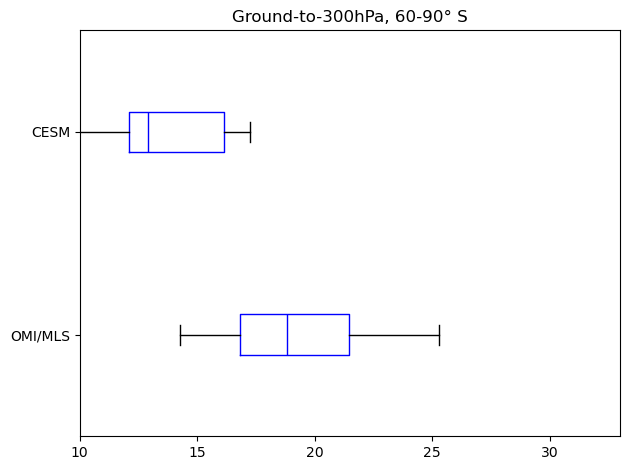

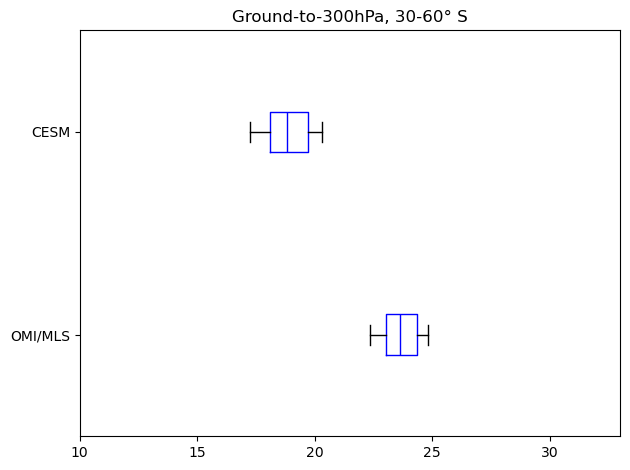

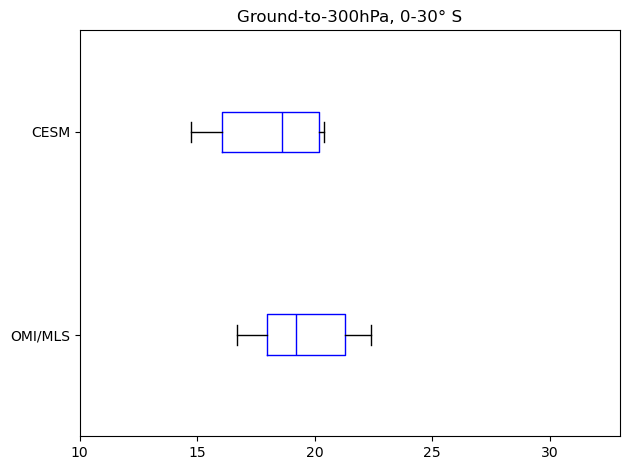

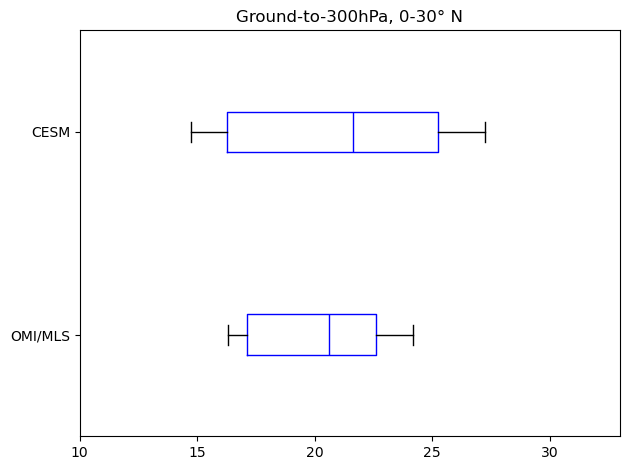

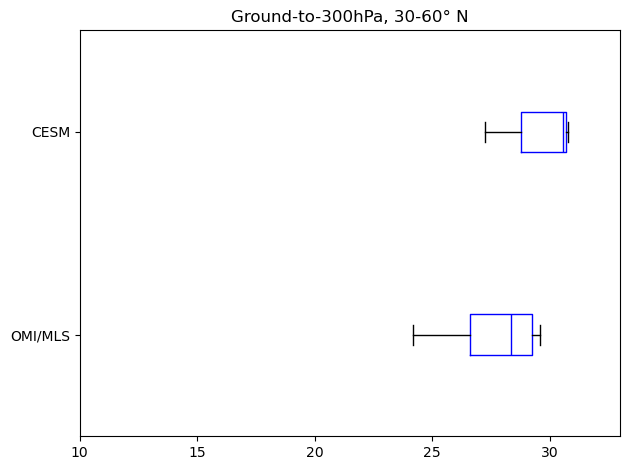

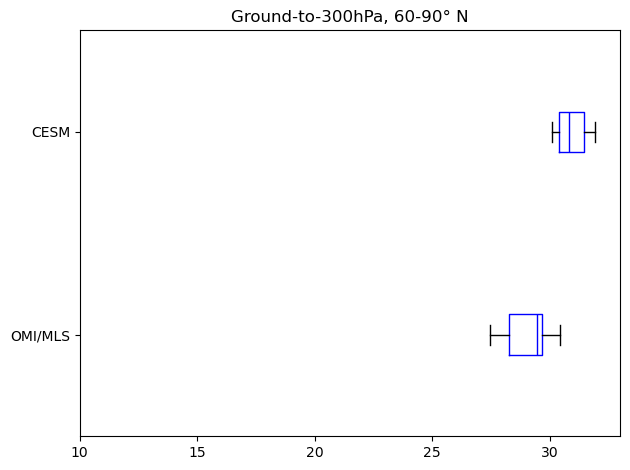

In [44]:
for i in range(6):
    ax = plt.subplot()
    plt.boxplot(
        data[i],
        boxprops=dict(color="blue"),
        medianprops=dict(color="blue"),
        tick_labels=["OMI/MLS", "CESM"],
        widths=0.2,
        orientation="horizontal",
    )

    ax.set_xlim(10, 33)
    plt.title("Ground-to-300hPa, " + str(title[i]))
    plt.tight_layout()
    plt.show()

In [45]:
difference = [
    [cesm_output_59_89s - omimls_ds_59_89s],
    [cesm_output_29_59s - omimls_ds_29_59s],
    [cesm_output_0_29s - omimls_ds_0_29s],
    [cesm_output_0_29n - omimls_ds_0_29n],
    [cesm_output_29_59n - omimls_ds_29_59n],
    [cesm_output_59_89n - omimls_ds_59_89n],
]

title = [
    "60-90° S",
    "30-60° S",
    "0-30° S",
    "0-30° N",
    "30-60° N",
    "60-90° N",
]

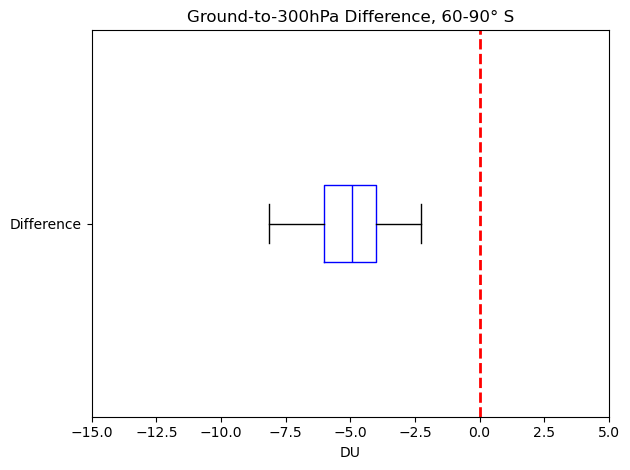

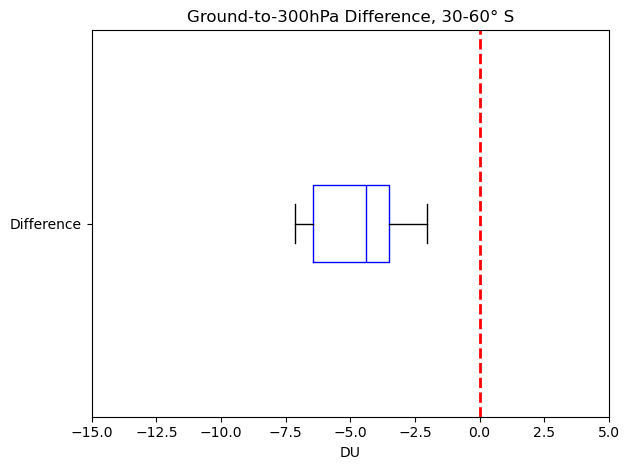

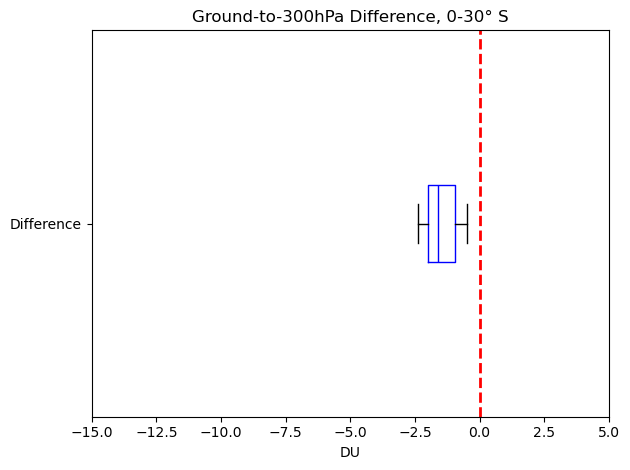

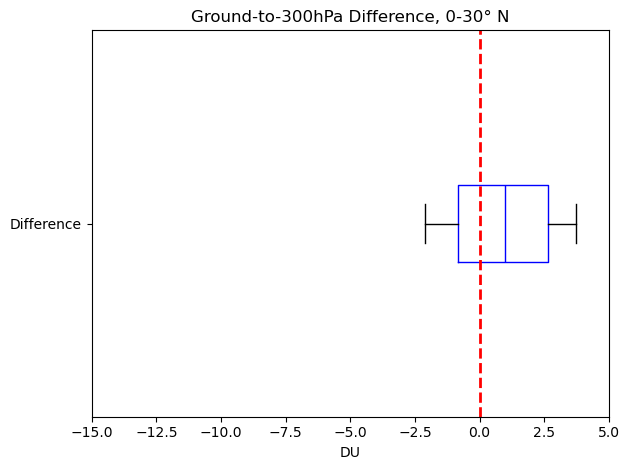

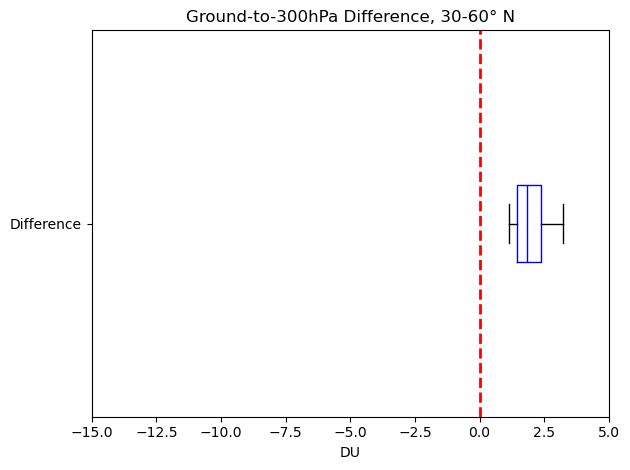

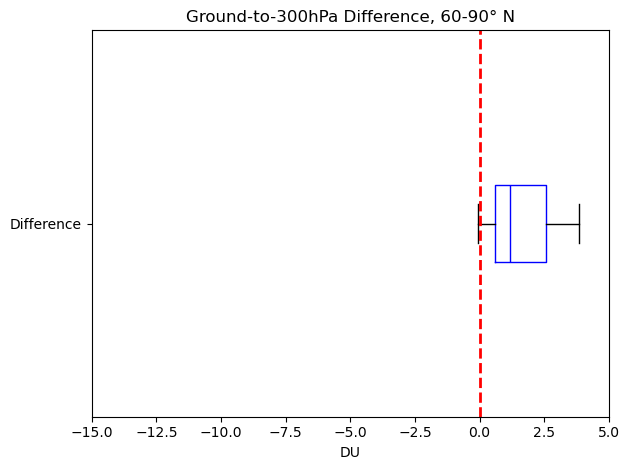

In [49]:
for i in range(6):
    ax = plt.subplot()
    plt.boxplot(
        difference[i],
        boxprops=dict(color="blue"),
        medianprops=dict(color="blue"),
        tick_labels=["Difference"],
        widths=0.2,
        orientation="horizontal",
    )
    plt.axvline(x=0, color="r", linestyle="--", linewidth=2)
    ax.set_xlim(-15, 5)
    plt.title("Ground-to-300hPa Difference, " + str(title[i]))
    plt.xlabel("DU")
    plt.tight_layout()
    plt.show()